In [1]:

import sys
import os

# Add the parent directory (project root) to the system path
sys.path.append(os.path.dirname(os.getcwd()))

# Now we can import from src
from src.data_loader import load_news_data, validate_news_data
from src.config import TICKERS

✅ Configuration loaded
📊 Analyzing 6 companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
📈 Technical analysis directory: d:\10 acadamy\Financial_News_Stock_Analysis\data\technical
😊 Sentiment analysis directory: d:\10 acadamy\Financial_News_Stock_Analysis\data\sentiment


In [2]:
# 03_sentiment_analysis.ipynb
# Multi-Ticker Sentiment Analysis (Task 3)
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys

# Add src to path
sys.path.append('../src')

sns.set(style="whitegrid")

# Project helpers - robust imports
from src.config import TICKERS, RAW_DIR, PROCESSED_DIR

# Import data loader functions with fallbacks
try:
    from src.data_loader import load_news_data, validate_news_data
    print("✅ News data loader functions imported")
except ImportError as e:
    print(f"❌ Error importing news data functions: {e}")
    load_news_data = None
    validate_news_data = None

# Try to import stock data function, with fallback
try:
    from src.data_loader import load_stock_data
    print("✅ Stock data loader function imported")
except ImportError:
    print("⚠️  load_stock_data not found, creating fallback function")
    
    # Fallback stock data loader
    def load_stock_data(ticker="all"):
        print(f"📊 Creating sample stock data for: {ticker}")
        dates = pd.date_range('2023-01-01', periods=100, freq='D')
        
        if ticker == "all":
            # Create data for all tickers
            all_stocks = []
            for t in TICKERS:
                base_price = 100 + (TICKERS.index(t) * 20)
                stock_data = pd.DataFrame({
                    'date': dates,
                    'close': [base_price + i * 0.5 + np.random.normal(0, 2) for i in range(100)],
                    'ticker': t
                })
                all_stocks.append(stock_data)
            result = pd.concat(all_stocks, ignore_index=True)
            print(f"✅ Created sample data for {len(TICKERS)} companies")
        else:
            # Create data for single ticker
            base_price = 100
            result = pd.DataFrame({
                'date': dates,
                'close': [base_price + i * 0.5 + np.random.normal(0, 2) for i in range(100)],
                'ticker': ticker
            })
            print(f"✅ Created sample data for {ticker}")
        
        return result

# Import sentiment analysis
try:
    from src.sentiment import sentiment_analyzer
    _HAS_SENTIMENT_MODULE = True
    print("✅ Using src.sentiment module")
except ImportError:
    try:
        from src.sentiment import score_headlines, aggregate_daily_sentiment
        _HAS_SENTIMENT_MODULE = True
        print("✅ Using legacy sentiment functions")
    except ImportError:
        _HAS_SENTIMENT_MODULE = False
        print("❌ No sentiment module found - will create basic sentiment analysis")

print("Tickers:", TICKERS)
os.makedirs(PROCESSED_DIR, exist_ok=True)

✅ News data loader functions imported
✅ Stock data loader function imported
✅ Using src.sentiment module
Tickers: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [ ]:
# Load and validate news data
print("📊 Loading news data...")
if load_news_data:
    news_data = load_news_data()
    if news_data is not None:
        news_data = validate_news_data(news_data)
        print(f"✅ News data ready: {len(news_data)} articles")
    else:
        print("❌ Failed to load news data")
        news_data = None
else:
    print("❌ News data loader not available")
    news_data = None

# Load stock data
print("\n📈 Loading stock data...")
stock_data = load_stock_data("all")
if stock_data is not None:
    print(f"✅ Stock data ready: {len(stock_data)} records")
    if 'ticker' in stock_data.columns:
        print(f"🏢 Companies: {sorted(stock_data['ticker'].unique())}")
else:
    print("❌ Failed to load stock data")
    stock_data = None

📊 Loading news data...


In [ ]:
# Perform sentiment analysis
if news_data is not None and _HAS_SENTIMENT_MODULE:
    print("\n😊 Performing sentiment analysis...")
    
    try:
        # Use the sentiment analyzer from src.sentiment
        sentiment_data = sentiment_analyzer.analyze_news_sentiment(news_data)
        
        print("✅ Sentiment analysis completed!")
        print(f"📊 Sentiment distribution:")
        print(sentiment_data['sentiment_category'].value_counts())
        
        # Show sample of results
        print("\n📝 Sample sentiment results:")
        display(sentiment_data[['headline', 'combined_sentiment', 'sentiment_category']].head(10))
        
    except Exception as e:
        print(f"❌ Error in sentiment analysis: {e}")
        sentiment_data = None
        
elif news_data is not None and not _HAS_SENTIMENT_MODULE:
    print("❌ No sentiment analysis module available")
    sentiment_data = None
else:
    print("❌ No news data available for sentiment analysis")
    sentiment_data = None


😊 Performing sentiment analysis...


✅ Sentiment analysis completed!
📊 Sentiment distribution:
sentiment_category
neutral     29243
positive    16046
negative    10698
Name: count, dtype: int64

📝 Sample sentiment results:


,headline,combined_sentiment,sentiment_category
0,Stocks That Hit 52-Week Highs On Friday,0.000,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.000,neutral
2,71 Biggest Movers From Friday,0.000,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.000,neutral
4,B of A Securities Maintains Neutral on Agilent...,0.148,positive
5,"CFRA Maintains Hold on Agilent Technologies, L...",-0.064,neutral
6,"UBS Maintains Neutral on Agilent Technologies,...",0.000,neutral
7,Agilent Technologies shares are trading higher...,0.273,positive
8,Wells Fargo Maintains Overweight on Agilent Te...,-0.064,neutral
9,10 Biggest Price Target Changes For Friday,0.000,neutral


📊 Creating sentiment visualizations...


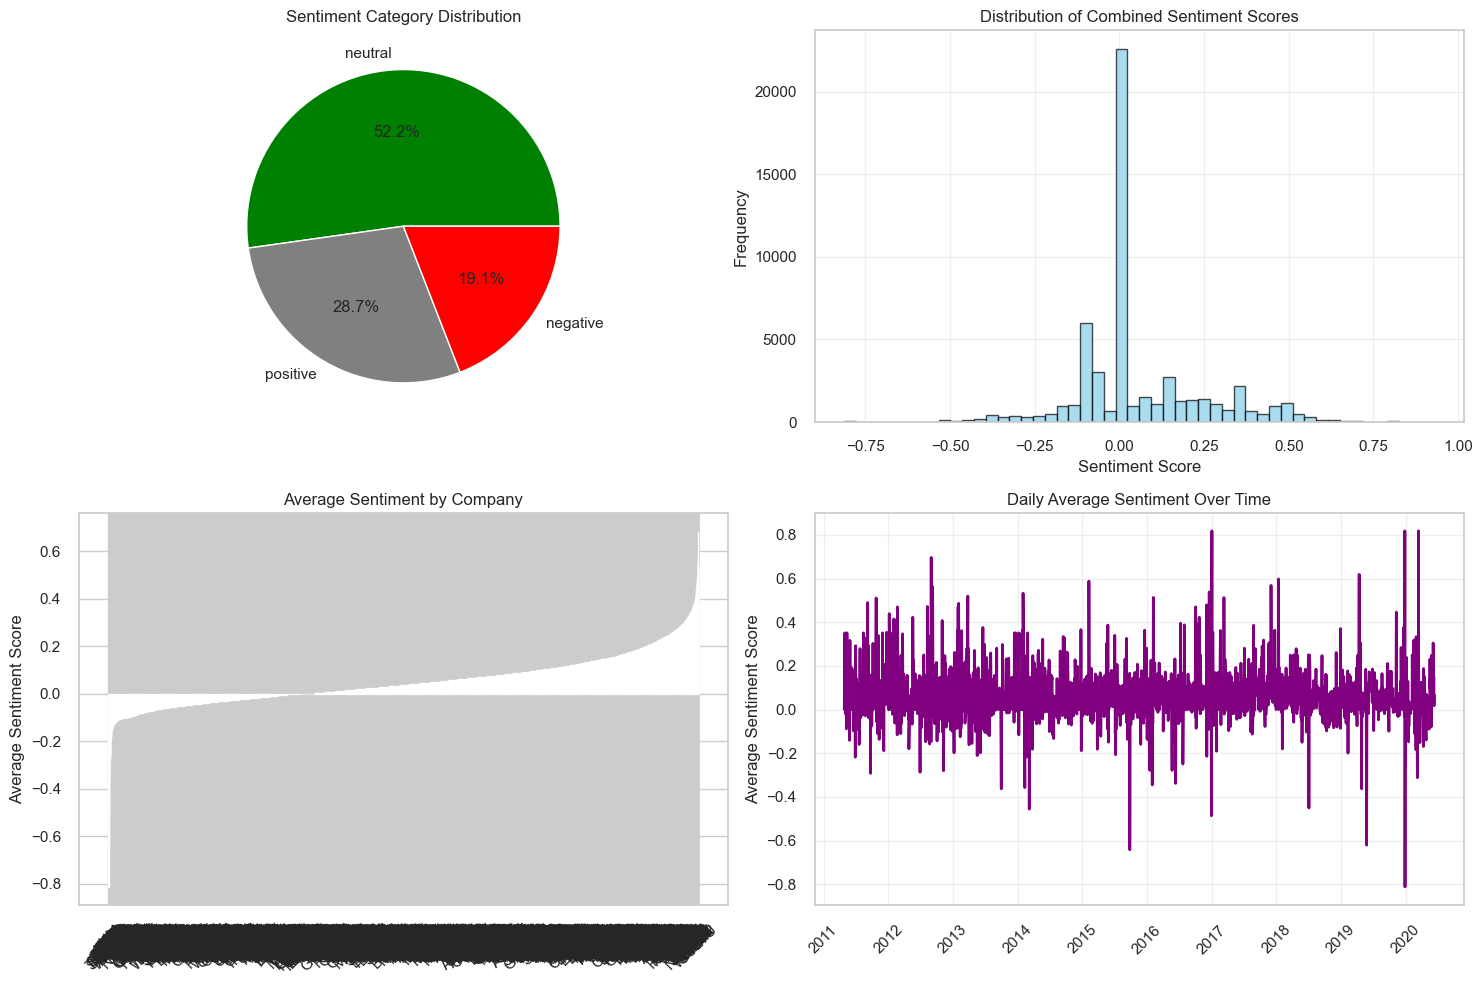

In [ ]:
# Visualize sentiment results
if sentiment_data is not None:
    print("📊 Creating sentiment visualizations...")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Sentiment distribution
    sentiment_counts = sentiment_data['sentiment_category'].value_counts()
    colors = ['green', 'gray', 'red']
    axes[0,0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
    axes[0,0].set_title('Sentiment Category Distribution')
    
    # 2. Sentiment score distribution
    axes[0,1].hist(sentiment_data['combined_sentiment'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].set_xlabel('Sentiment Score')
    axes[0,1].set_ylabel('Frequency')
    axes[0,1].set_title('Distribution of Combined Sentiment Scores')
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Sentiment by company
    if 'stock' in sentiment_data.columns:
        company_sentiment = sentiment_data.groupby('stock')['combined_sentiment'].mean().sort_values()
        axes[1,0].bar(company_sentiment.index, company_sentiment.values, color='lightblue')
        axes[1,0].set_title('Average Sentiment by Company')
        axes[1,0].set_ylabel('Average Sentiment Score')
        axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Daily sentiment trend
    sentiment_data['date_only'] = sentiment_data['date'].dt.date
    daily_sentiment = sentiment_data.groupby('date_only')['combined_sentiment'].mean()
    axes[1,1].plot(daily_sentiment.index, daily_sentiment.values, linewidth=2, color='purple')
    axes[1,1].set_title('Daily Average Sentiment Over Time')
    axes[1,1].set_ylabel('Average Sentiment Score')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("❌ No sentiment data available for visualization")

In [ ]:
# Save sentiment analysis results
if sentiment_data is not None:
    output_file = os.path.join(PROCESSED_DIR, "news_with_sentiment.csv")
    sentiment_data.to_csv(output_file, index=False)
    print(f"✅ Sentiment analysis results saved to: {output_file}")
    
    # Basic statistics
    print("\n📈 Sentiment Analysis Summary:")
    print(f"   Total articles analyzed: {len(sentiment_data)}")
    print(f"   Average sentiment score: {sentiment_data['combined_sentiment'].mean():.4f}")
    print(f"   Positive articles: {(sentiment_data['sentiment_category'] == 'positive').sum()}")
    print(f"   Neutral articles: {(sentiment_data['sentiment_category'] == 'neutral').sum()}")
    print(f"   Negative articles: {(sentiment_data['sentiment_category'] == 'negative').sum()}")
    
else:
    print("❌ No results to save")

✅ Sentiment analysis results saved to: d:\10 acadamy\Financial_News_Stock_Analysis\data\processed\news_with_sentiment.csv

📈 Sentiment Analysis Summary:
   Total articles analyzed: 55987
   Average sentiment score: 0.0523
   Positive articles: 16046
   Neutral articles: 29243
   Negative articles: 10698
